In [2]:
!pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/5b/46/3def5bdaae03c21a7662673e6bda1f60a046afce48e0d6319ce4542bca31/torch-2.1.1-cp311-none-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 45.3 MB/s eta 0:00:0000:0100:01


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F # convolution function, pooling function, activation function, dropout function, loss function 등의 기능 제공
import torch.optim as optim #optimizer 제공
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

가중치(w): -0.5208, 편향(b): -0.6593
에폭 [100/1000], 손실: 1.1940, 가중치(w): 2.0934, 편향(b): 0.1992
에폭 [200/1000], 손실: 1.1135, 가중치(w): 2.0518, 편향(b): 0.4758
에폭 [300/1000], 손실: 1.0837, 가중치(w): 2.0265, 편향(b): 0.6440
에폭 [400/1000], 손실: 1.0727, 가중치(w): 2.0111, 편향(b): 0.7463
에폭 [500/1000], 손실: 1.0687, 가중치(w): 2.0017, 편향(b): 0.8084
에폭 [600/1000], 손실: 1.0672, 가중치(w): 1.9961, 편향(b): 0.8462
에폭 [700/1000], 손실: 1.0666, 가중치(w): 1.9926, 편향(b): 0.8692
에폭 [800/1000], 손실: 1.0664, 가중치(w): 1.9905, 편향(b): 0.8832
에폭 [900/1000], 손실: 1.0663, 가중치(w): 1.9892, 편향(b): 0.8917
에폭 [1000/1000], 손실: 1.0663, 가중치(w): 1.9885, 편향(b): 0.8969
최적화된 가중치(w): 1.9885, 최적화된 편향(b): 0.8969


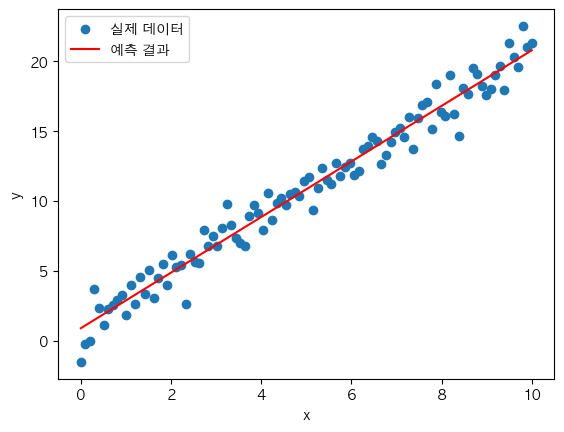

In [6]:
# 학습 데이터 생성
x = torch.linspace(0, 10, 100).unsqueeze(1)  # 입력 데이터
y = 2*x + 1 + torch.randn(100, 1)  # 정답 레이블 (기울기: 2, 절편: 1)

# 모델 정의
model = nn.Linear(1, 1)  # 선형 모델 (입력 차원: 1, 출력 차원: 1)

# 손실 함수 정의
criterion = nn.MSELoss()

# 옵티마이저 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 학습
num_epochs = 1000  # 에폭 수

w = model.weight.item()
b = model.bias.item()
print(f'가중치(w): {w:.4f}, 편향(b): {b:.4f}')

for epoch in range(num_epochs):
    # Forward 계산
    outputs = model(x)
    
    # 손실 계산
    loss = criterion(outputs, y)
    
    # Backward 계산 및 경사 하강
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 중간 결과 출력
    if (epoch+1) % 100 == 0:
        w = model.weight.item()
        b = model.bias.item()
        print(f'에폭 [{epoch+1}/{num_epochs}], 손실: {loss.item():.4f}, 가중치(w): {w:.4f}, 편향(b): {b:.4f}')

# 최적화된 가중치(w)와 편향(b) 확인
w_opt = model.weight.item()
b_opt = model.bias.item()
print(f'최적화된 가중치(w): {w_opt:.4f}, 최적화된 편향(b): {b_opt:.4f}')

# 학습된 모델의 예측 결과 확인
predicted = model(x)

# 그래프 그리기
plt.scatter(x, y, label='실제 데이터')
plt.plot(x, predicted.detach().numpy(), color='red', label='예측 결과')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
# 실습

data1 = [[1,2],[3,4]]
data2 = [[5,6],[7,8]]

t1 = torch.tensor(data1)
t2 = torch.tensor(data2)

tmul = torch.matmul(t1,t2)
# tmul = t1.matmul(t2)
# tmul = t1 @ t2
print(tmul) # 행렬곱

print(tmul.sum().item()) # 각 원소의 합

mul = torch.mul(t1,t2)
# mul = t1 * t2
print(mul) # 원소의 곱

tensor([[19, 22],
        [43, 50]])
134
tensor([[ 5, 12],
        [21, 32]])


----
# 다중선형회귀

In [8]:
torch.manual_seed(1)  #seed를 고정하여 동일한 난수를 생성하도록 함

x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad() # 미분한 값들은 누적되는 특징이 있기 때문에 0으로 초기화
    cost.backward() # 역전파
    optimizer.step() # 역전파시에 계산된 값으로 매개변수 수정

    # 100번마다 로그 출력
    if epoch % 100 ==0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))
        
print(x1_train * w1 + x2_train * w2 + x3_train * w3 + b)

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563634
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497607
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435026
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375730
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319511
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215696
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167818
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079378
tensor([[152.4309],
        [183.9321],
        [180.8576],
        [196.9722],
        [140.4547]], grad_fn=<AddBackward0>)


----
# 다중선형회귀-행렬

In [13]:
torch.manual_seed(1)

x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

print(x_train.shape)
print(y_train.shape)

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)


nb_epochs = 1000

for epoch in range(nb_epochs + 1):

    # H(X) 계산
    # 편향 b는 브로드캐스팅되어 각 샘플에 더해진다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 ==0:
        print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
            epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
        ))
    


torch.Size([5, 3])
torch.Size([5, 1])
Epoch    0/1000 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch  100/1000 hypothesis: tensor([152.7691, 183.6985, 180.9591, 197.0627, 140.1336]) Cost: 1.563634
Epoch  200/1000 hypothesis: tensor([152.7273, 183.7273, 180.9465, 197.0517, 140.1731]) Cost: 1.497607
Epoch  300/1000 hypothesis: tensor([152.6866, 183.7554, 180.9343, 197.0409, 140.2116]) Cost: 1.435026
Epoch  400/1000 hypothesis: tensor([152.6470, 183.7827, 180.9224, 197.0304, 140.2491]) Cost: 1.375730
Epoch  500/1000 hypothesis: tensor([152.6085, 183.8093, 180.9108, 197.0201, 140.2856]) Cost: 1.319511
Epoch  600/1000 hypothesis: tensor([152.5711, 183.8352, 180.8996, 197.0101, 140.3211]) Cost: 1.266222
Epoch  700/1000 hypothesis: tensor([152.5346, 183.8604, 180.8887, 197.0003, 140.3558]) Cost: 1.215696
Epoch  800/1000 hypothesis: tensor([152.4992, 183.8849, 180.8781, 196.9908, 140.3895]) Cost: 1.167818
Epoch  900/1000 hypothesis: tensor([152.4647, 183.9087, 180.8677, 196.

----
# 다중선형회귀-class

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 데이터셋
x_data = torch.tensor([[73, 80, 75],
                       [93, 88, 93],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]], dtype=torch.float32)

y_data = torch.tensor([[152],
                       [185],
                       [180],
                       [196],
                       [142]], dtype=torch.float32)


# 다중 선형 회귀 클래스
class MultiLinearRegression(nn.Module):
    def __init__(self):
        super(MultiLinearRegression, self).__init__()
        self.linear = nn.Linear(3, 1) # 입력 3개, 출력 1개

    def forward(self, x):
        return self.linear(x)


model = MultiLinearRegression()

# 손실 함수와 옵티마이저
loss_fn = nn.MSELoss()  # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=1e-5)

# 학습
epochs = 2000
for epoch in range(epochs + 1):
    prediction = model(x_data)

    loss = loss_fn(prediction, y_data)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 ==0:
      print('Epoch {:4d}/{} prediction: {} Cost: {:.6f}'.format(
          epoch, epochs, prediction.squeeze().detach(), loss.item()
      ))

# 예측
model.eval()
x_test = torch.tensor([[90, 88, 93]], dtype=torch.float32)
y_test = model(x_test)
print(f"예측 값: {y_test.squeeze().detach()}")



Epoch    0/2000 prediction: tensor([-20.5930, -30.8318, -27.2626, -29.8314, -24.8466]) Cost: 39633.414062
Epoch  100/2000 prediction: tensor([155.8949, 181.5397, 181.8628, 197.9131, 137.1906]) Cost: 11.480746
Epoch  200/2000 prediction: tensor([155.7680, 181.6269, 181.8242, 197.8828, 137.3070]) Cost: 10.894592
Epoch  300/2000 prediction: tensor([155.6446, 181.7118, 181.7867, 197.8534, 137.4203]) Cost: 10.339335
Epoch  400/2000 prediction: tensor([155.5245, 181.7943, 181.7502, 197.8246, 137.5306]) Cost: 9.813351
Epoch  500/2000 prediction: tensor([155.4076, 181.8747, 181.7147, 197.7966, 137.6380]) Cost: 9.315010
Epoch  600/2000 prediction: tensor([155.2939, 181.9529, 181.6802, 197.7694, 137.7425]) Cost: 8.842962
Epoch  700/2000 prediction: tensor([155.1833, 182.0289, 181.6465, 197.7427, 137.8443]) Cost: 8.395753
Epoch  800/2000 prediction: tensor([155.0756, 182.1030, 181.6139, 197.7168, 137.9434]) Cost: 7.972028
Epoch  900/2000 prediction: tensor([154.9709, 182.1750, 181.5820, 197.6915,

In [6]:
# 실습2

x = [[ 1.76405235,  0.40015721],
 [ 0.3130677,  -0.85409574],
 [ 1.86755799, -0.97727788],
 [ 0.95008842, -0.15135721],
 [ 0.14404357,  1.45427351],
 [ 0.76103773,  0.12167502],
 [ 0.44386323,  0.33367433],
 [ 0.97873798,  2.2408932 ],
 [ 1.49407907, -0.20515826],
 [-0.10321885,  0.4105985 ]]

y = [ 63.53688815, -71.72648252, -61.68390971,   1.57941977, 140.99124416, 25.4497451, 40.69691806, 229.37436452,   6.57023041,  42.57804267]

x1=torch.tensor(x)
y1=torch.tensor(y)

w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.Adam([w1, w2, b], lr=1e-1)

nb_epochs = 100000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1[:,0] * w1 + x1[:,1] * w2 + b

    # cost 계산
    cost = torch.mean((hypothesis - y1) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad() # 미분한 값들은 누적되는 특징이 있기 때문에 0으로 초기화
    cost.backward() # 역전파
    optimizer.step() # 역전파시에 계산된 값으로 매개변수 수정

    # 100번마다 로그 출력
    if epoch % 10000 ==0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), b.item(), cost.item()
        ))

print(f"w1: {w1.item()}, w2: {w2.item()}, b: {b.item()}, cost: {cost.item()}")

Epoch    0/100000 w1: 0.100 w2: 0.100 b: 0.100 Cost: 8964.013672
Epoch 10000/100000 w1: 13.555 w2: 93.896 b: 4.020 Cost: 1.580652
Epoch 20000/100000 w1: 13.556 w2: 93.896 b: 4.020 Cost: 1.580661
Epoch 30000/100000 w1: 13.555 w2: 93.896 b: 4.020 Cost: 1.580655
Epoch 40000/100000 w1: 13.557 w2: 93.898 b: 4.022 Cost: 1.580671
Epoch 50000/100000 w1: 13.555 w2: 93.896 b: 4.020 Cost: 1.580660
Epoch 60000/100000 w1: 13.555 w2: 93.896 b: 4.020 Cost: 1.580660
Epoch 70000/100000 w1: 13.554 w2: 93.894 b: 4.018 Cost: 1.580676
Epoch 80000/100000 w1: 13.555 w2: 93.896 b: 4.020 Cost: 1.580658
Epoch 90000/100000 w1: 13.556 w2: 93.897 b: 4.021 Cost: 1.580657
Epoch 100000/100000 w1: 13.554 w2: 93.895 b: 4.019 Cost: 1.580671
w1: 13.554208755493164, w2: 93.89492797851562, b: 4.018819332122803, cost: 1.5806708335876465
